In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_csv_data = pd.read_csv(r'C:\Users\Admin\Desktop\TM SERIES\Ontario data - 19 June 2020.csv') 
df=raw_csv_data.copy()

In [3]:
df.describe()

,Cases,RR,GP,Parks,Transit,Workplace,Residential
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,14122.621622,-38.450450,-11.414414,21.738739,-52.090090,-42.936937,16.666667
std,11726.538912,20.058432,16.139431,49.977761,21.260099,22.413583,8.539037
min,15.000000,-82.000000,-68.000000,-47.000000,-81.000000,-86.000000,-1.000000
25%,1174.000000,-53.000000,-21.000000,-14.500000,-66.500000,-59.500000,11.500000
50%,13995.000000,-44.000000,-12.000000,3.000000,-57.000000,-49.000000,18.000000
75%,24834.000000,-30.500000,-3.500000,60.000000,-49.500000,-35.000000,24.000000
max,33095.000000,13.000000,41.000000,153.000000,8.000000,9.000000,36.000000


In [5]:
df.Date.describe()

count            111
unique           111
top       19-03-2020
freq               1
Name: Date, dtype: object

In [6]:
df.Date = pd.to_datetime(df.Date, dayfirst = True)

In [7]:
df.head()

,Date,Cases,RR,GP,Parks,Transit,Workplace,Residential
0,2020-03-01,15,11,10,23,4,6,-1
1,2020-03-02,20,2,4,0,-2,4,0
2,2020-03-03,20,1,3,-6,0,4,0
3,2020-03-04,22,4,4,1,0,4,0
4,2020-03-05,22,6,6,21,2,0,0


In [8]:
df.Date.describe()

count                     111
unique                    111
top       2020-03-13 00:00:00
freq                        1
first     2020-03-01 00:00:00
last      2020-06-19 00:00:00
Name: Date, dtype: object

In [9]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [48]:
df

,Cases,RR,GP,Parks,Transit,Workplace,Residential
Date,,,,,,,
2020-03-01,15,11,10,23,4,6,-1
2020-03-02,20,2,4,0,-2,4,0
2020-03-03,20,1,3,-6,0,4,0
2020-03-04,22,4,4,1,0,4,0
2020-03-05,22,6,6,21,2,0,0
2020-03-06,28,-3,-4,-4,-3,3,1
2020-03-07,28,10,9,41,8,9,-1
2020-03-08,31,13,10,86,6,5,-1
2020-03-09,34,4,5,41,-3,3,1


In [10]:
df.head()

,Cases,RR,GP,Parks,Transit,Workplace,Residential
Date,,,,,,,
2020-03-01,15,11,10,23,4,6,-1
2020-03-02,20,2,4,0,-2,4,0
2020-03-03,20,1,3,-6,0,4,0
2020-03-04,22,4,4,1,0,4,0
2020-03-05,22,6,6,21,2,0,0


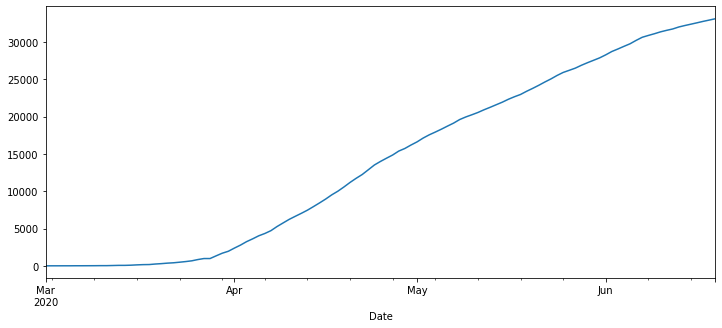

In [11]:
df['Cases'].plot(figsize=(12,5));

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(df['Cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.923414
p-value                   0.321128
# lags used               4.000000
# observations          106.000000
critical value (1%)      -3.493602
critical value (5%)      -2.889217
critical value (10%)     -2.581533
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


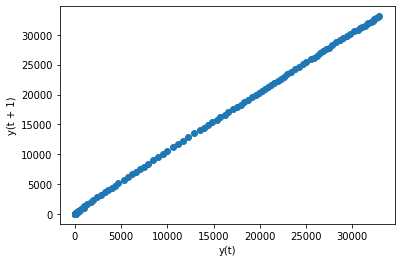

In [14]:
from pandas.plotting import lag_plot

lag_plot(df['Cases']);

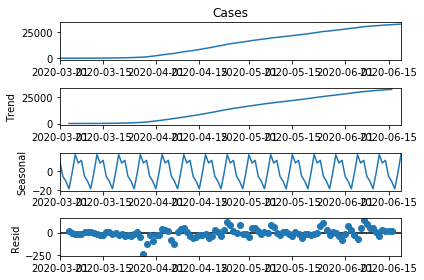

In [15]:
result = seasonal_decompose(df['Cases'])
result.plot();

In [22]:
step=auto_arima(df['Cases'],exogenous=df[['RR', 'GP', 'Parks', 'Transit', 'Workplace', 'Residential']],seasonal=False,start_p=1,
    d=2,
    start_q=1,
    max_p=6,
    max_d=4,
    max_q=6,stepwise=True,Trace= True,error_action='ignore',
    n_jobs=1)

In [23]:
step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -611.714
Date:                Wed, 24 Jun 2020   AIC                           1241.428
Time:                        20:34:36   BIC                           1265.650
Sample:                    03-01-2020   HQIC                          1251.251
                         - 06-19-2020                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.6390      3.739      0.438      0.661      -5.689       8.967
RR              0.2275      3.359      0.068      0.946      -6.357       6.812
GP              0.0105      1.882      0.006      0.996      -3.678       3.699
Parks           0.2323      0.408      0.569      0.569      -0.568       1.033
Transit        -0.7150      3.416     -0.209      0.834      -7.411       5.981
Workplace       1.2442      1.293      0.962      0.336      -1.289       3.778
Residential     2.0693      1.922      1.076      0.282      -1.698       5.837
ma.L1          -0.4556      0.083     -5.521      0.000      -0.617      -0.294
sigma2       4376.3121    543.957      8.045      0.000    3310.175    5442.449
===================================================================================
Ljung-Box (Q):                       37.51   Jarque-Bera (JB):                43.66
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.60
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
len(df)-7

104

In [25]:
train = df.iloc[:104]
test = df.iloc[104:]

In [42]:
model = SARIMAX(train['Cases'],exog=train[['RR', 'GP', 'Parks', 'Transit', 'Workplace', 'Residential']],order=(0,2,1),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  104
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -575.555
Date:                Wed, 24 Jun 2020   AIC                           1167.110
Time:                        21:16:57   BIC                           1188.109
Sample:                    03-01-2020   HQIC                          1175.613
                         - 06-12-2020                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
RR              0.3202      3.609      0.089      0.929      -6.753       7.394
GP              0.0070      2.030      0.003      0.997      -3.971       3.985
Parks           0.2395      0.421      0.568      0.570      -0.586       1.065
Transit        -0.9134      3.562     -0.256      0.798      -7.895       6.068
Workplace       1.0539      1.388      0.759      0.448      -1.667       3.775
Residential     1.6106      2.076      0.776      0.438      -2.457       5.679
ma.L1          -0.4461      0.088     -5.049      0.000      -0.619      -0.273
sigma2       4654.2865    599.706      7.761      0.000    3478.885    5829.688
===================================================================================
Ljung-Box (Q):                       37.44   Jarque-Bera (JB):                32.41
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.57
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['RR', 'GP', 'Parks', 'Transit', 'Workplace', 'Residential']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(0,2,1) Predictions')

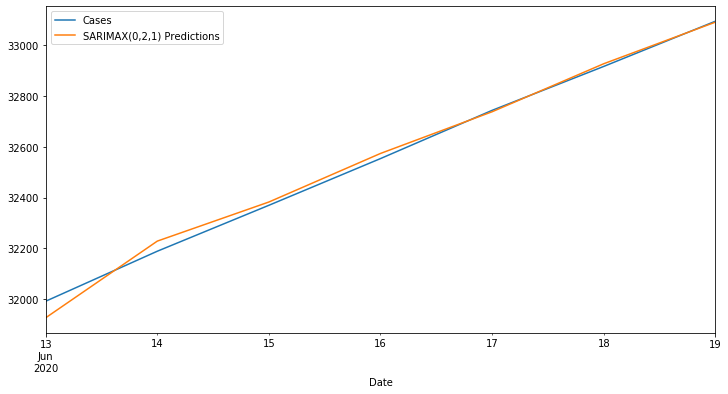

In [50]:
ax = test['Cases'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [56]:
model = SARIMAX(df['Cases'],order=(0,2,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('ARIMA(0,2,1) Forecast')


In [61]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Cases'], predictions)
print(f'ARIMA(0,2,1) RMSE Error: {error:11.10}')

ARIMA(0,2,1) RMSE Error:  30.6366629


In [63]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['Cases'], predictions)
print(f'ARIMA(0,2,1) MAE Error: {error:11.10}')

ARIMA(0,2,1) MAE Error: 22.55452065


In [64]:
# r squared values 
import numpy as np
correlation_matrix = np.corrcoef(test['Cases'], predictions)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.9938391137791946


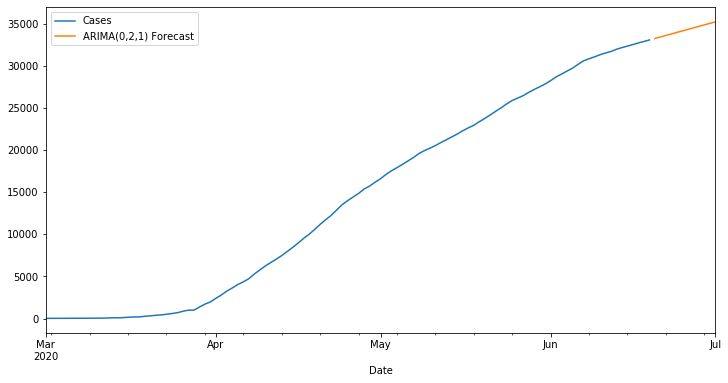

In [58]:
ax = df['Cases'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)